<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


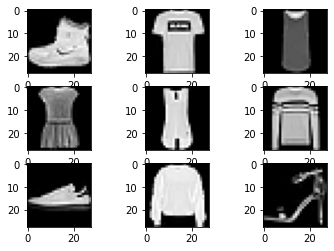

In [ ]:
# plot first few images
import matplotlib.pyplot as plt
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = keras.models.Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model.add(Flatten())  

model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 15s 6ms/step - loss: 0.5443 - accuracy: 0.8051 - val_loss: 0.3970 - val_accuracy: 0.8580
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3541 - accuracy: 0.8742 - val_loss: 0.3282 - val_accuracy: 0.8817
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3100 - accuracy: 0.8870 - val_loss: 0.3095 - val_accuracy: 0.8897
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2804 - accuracy: 0.8983 - val_loss: 0.2942 - val_accuracy: 0.8941
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2579 - accuracy: 0.9055 - val_loss: 0.2745 - val_accuracy: 0.9012
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2386 - accuracy: 0.9119 - val_loss: 0.2780 - val_accuracy: 0.8972
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2207 - accuracy: 0.9181 - val_loss: 0.2655 - val_accuracy: 0.9047
Epoch

In [ ]:
eval_result = model.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.9040
[test loss, test accuracy]: [0.2671106457710266, 0.9039999842643738]


In [ ]:
! pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# Normalize pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(Conv2D(hp.Int('conv_0_units', 
                        min_value=32, 
                        max_value=256, 
                        step=32), 
                  (3, 3), 
                  input_shape=X_train.shape[1:]))

  model.add(Activation(hp.Choice(f"conv_0_activation", 
                              ['relu']
                              )))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  
  for i in range(hp.Int('conv_layers', 2, 5)):
    model.add(Conv2D(hp.Int(f'conv_{i+1}_units', 
                            min_value=32, 
                            max_value=256, 
                            step=32), 
                     (3, 3)))
    model.add(Activation(hp.Choice(f"conv_{i+1}_activation", 
                              ['relu']
                              )))
  
  # this converts our 3D feature maps to 1D feature vectors
  model.add(Flatten())  
  
  for i in range(hp.Int('dense_layers', 2, 5)):
    model.add(Dense(units=hp.Int(f'dense_{i}_units', 
                      min_value=32, 
                      max_value=512, 
                      step=32)))
    model.add(Activation(hp.Choice(f"dense_{i}_activation", 
                              ['relu', 'sigmoid']
                              )))
  
  model.add(Dense(10))
  model.add(Activation('softmax'))

  
  model.compile(optimizer=keras.optimizers.Adam(
                # Choose an optimal value from 0.01, 0.001, or 0.0001
                learning_rate=hp.Choice('learning_rate', 
                               values=[1e-2, 1e-3, 1e-4])),
                loss=hp.Choice('loss_function', 
                               values=['sparse_categorical_crossentropy']),
                metrics=['accuracy'])
  
  return model

In [ ]:
!rm -rf 'keras_tuner'

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='.',
    project_name='keras_tuner'
)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x=X_train, 
             y=y_train,
             epochs=10,
             validation_split=0.2,
             callbacks=[stop_early])

Trial 3 Complete [00h 06m 38s]
val_accuracy: 0.9120833277702332

Best val_accuracy So Far: 0.9120833277702332
Total elapsed time: 00h 20m 57s


In [ ]:
tuner.results_summary()

Results summary
Results in ./keras_tuner
Showing 10 best trials
Trial summary
Hyperparameters:
conv_0_units: 128
conv_0_activation: relu
conv_layers: 3
conv_1_units: 32
conv_1_activation: relu
conv_2_units: 32
conv_2_activation: relu
dense_layers: 4
dense_0_units: 320
dense_0_activation: relu
dense_1_units: 128
dense_1_activation: sigmoid
learning_rate: 0.001
loss_function: sparse_categorical_crossentropy
conv_3_units: 96
conv_3_activation: relu
conv_4_units: 224
conv_4_activation: relu
conv_5_units: 160
conv_5_activation: relu
dense_2_units: 416
dense_2_activation: relu
dense_3_units: 160
dense_3_activation: relu
Score: 0.9120833277702332
Trial summary
Hyperparameters:
conv_0_units: 128
conv_0_activation: relu
conv_layers: 4
conv_1_units: 64
conv_1_activation: relu
conv_2_units: 128
conv_2_activation: relu
dense_layers: 4
dense_0_units: 192
dense_0_activation: relu
dense_1_units: 96
dense_1_activation: sigmoid
learning_rate: 0.001
loss_function: sparse_categorical_crossentropy
conv_3_

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'conv_0_units': 128,
 'conv_0_activation': 'relu',
 'conv_layers': 3,
 'conv_1_units': 32,
 'conv_1_activation': 'relu',
 'conv_2_units': 32,
 'conv_2_activation': 'relu',
 'dense_layers': 4,
 'dense_0_units': 320,
 'dense_0_activation': 'relu',
 'dense_1_units': 128,
 'dense_1_activation': 'sigmoid',
 'learning_rate': 0.001,
 'loss_function': 'sparse_categorical_crossentropy',
 'conv_3_units': 96,
 'conv_3_activation': 'relu',
 'conv_4_units': 224,
 'conv_4_activation': 'relu',
 'conv_5_units': 160,
 'conv_5_activation': 'relu',
 'dense_2_units': 416,
 'dense_2_activation': 'relu',
 'dense_3_units': 160,
 'dense_3_activation': 'relu'}

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 13s 7ms/step - loss: 0.5605 - accuracy: 0.7887 - val_loss: 0.3813 - val_accuracy: 0.8572
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3342 - accuracy: 0.8765 - val_loss: 0.3217 - val_accuracy: 0.8861
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2858 - accuracy: 0.8956 - val_loss: 0.2882 - val_accuracy: 0.9004
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2509 - accuracy: 0.9076 - val_loss: 0.2850 - val_accuracy: 0.8938
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2213 - accuracy: 0.9175 - val_loss: 0.2694 - val_accuracy: 0.9028
Epoch 6/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1975 - accuracy: 0.9269 - val_loss: 0.2728 - val_accuracy: 0.9069
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1773 - accuracy: 0.9349 - val_loss: 0.2675 - val_accura

In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 9


In [ ]:
eval_result = model.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 0.5752 - accuracy: 0.9026
[test loss, test accuracy]: [0.5752280354499817, 0.9025999903678894]


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/9
1500/1500 [==============================] - 14s 7ms/step - loss: 0.5772 - accuracy: 0.7787 - val_loss: 0.4310 - val_accuracy: 0.8385
Epoch 2/9
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3510 - accuracy: 0.8717 - val_loss: 0.3309 - val_accuracy: 0.8786
Epoch 3/9
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2934 - accuracy: 0.8915 - val_loss: 0.3348 - val_accuracy: 0.8811
Epoch 4/9
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2586 - accuracy: 0.9053 - val_loss: 0.2925 - val_accuracy: 0.8946
Epoch 5/9
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2287 - accuracy: 0.9160 - val_loss: 0.2550 - val_accuracy: 0.9058
Epoch 6/9
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2044 - accuracy: 0.9245 - val_loss: 0.2577 - val_accuracy: 0.9095
Epoch 7/9
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1853 - accuracy: 0.9319 - val_loss: 0.2696 - val_accuracy: 0.90

In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.9121
[test loss, test accuracy]: [0.28215882182121277, 0.9121000170707703]


In [ ]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 activation_18 (Activation)  (None, 26, 26, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        36896     
                                                                 
 activation_19 (Activation)  (None, 11, 11, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 32)          9248      
                                                      

In [ ]:
tuner.get_best_models()[0]